In [4]:
# Mount GDRIVE jika menggunakan Google Collab
from google.colab import drive
drive.mount('/content/drive')

PATH = '/content/drive/MyDrive/Source Code/'

# Jika tidak menggunakan google collab
# PATH = ''

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# !pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 121.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 25.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [5]:
!pip install numpy --upgrade
!pip install gensim --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 93.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found e

In [2]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

## Membaca Dataset Hasil Preprocessing

In [6]:
PATH = ""

In [7]:
data = pd.read_csv(PATH + 'hasil_preprocessing.csv', delimiter=',')
data

,sentimen,Tweet,casefolding,cleaning,stopwords,stemming
0,-1,lagu bosan apa yang aku save ni huhuhuhuhuhuhu...,lagu bosan apa yang aku save ni huhuhuhuhuhuhu...,lagu bosan yang save,lagu bosan save,lagu bosan save
1,-1,kita lanjutkan saja diam ini hingga kau dan ak...,kita lanjutkan saja diam ini hingga kau dan ak...,kita lanjutkan saja diam ini hingga kau dan m...,lanjutkan diam mengerti hati,lanjut diam erti hati
2,1,doa rezeki tak putus inna haa zaa larizquna ma...,doa rezeki tak putus inna haa zaa larizquna ma...,doa rezeki tak putus inna haa larizquna maa l...,doa rezeki putus inna haa larizquna maa lahu ...,doa rezeki putus inna haa larizquna maa lahu m...
3,1,makasih loh ntar kita bagi hasil aku 99 9 sisa...,makasih loh ntar kita bagi hasil aku 99 9 sisa...,makasih loh ntar kita bagi hasil sisanya buat...,makasih loh ntar hasil sisanya,makasih loh ntar hasil sisa
4,-1,aku tak faham betul jenis orang malaysia yang ...,aku tak faham betul jenis orang malaysia yang ...,tak faham betul jenis orang malaysia yang tak...,faham jenis orang malaysia reti nak sangkut h...,faham jenis orang malaysia ret nak sangkut hos...
...,...,...,...,...,...,...
10801,1,Jangan membandingkan kehidupanmu dengan kehidu...,jangan membandingkan kehidupanmu dengan kehidu...,jangan dengan kehidupan orang lain karena se...,kehidupan orang memiliki karunia,hidup orang milik karunia
10802,0,Sini uname lu ntar gua follow,sini uname lu ntar gua follow,sini uname ntar gua follow,uname ntar gua follow,uname ntar gua follow
10803,1,Apapun yg telah kamu lakukan apapun kesalahanm...,apapun yg telah kamu lakukan apapun kesalahanm...,telah kamu lakukan kamu selalu menemukan ...,lakukan menemukan maaf hati botkece,laku temu maaf hati botkece
10804,1,3 cara untuk ingat semula apa yang kita dah ha...,3 cara untuk ingat semula apa yang kita dah ha...,cara untuk ingat semula yang kita dah hafal,dah hafal,dah hafal


Menampilkan informasi data.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10806 entries, 0 to 10805
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sentimen     10806 non-null  int64 
 1   Tweet        10806 non-null  object
 2   casefolding  10806 non-null  object
 3   cleaning     10780 non-null  object
 4   stopwords    10706 non-null  object
 5   stemming     10618 non-null  object
dtypes: int64(1), object(5)
memory usage: 506.7+ KB


Menampilkan jumlah data Null setiap kolom.

In [9]:
data.isnull().sum()

sentimen         0
Tweet            0
casefolding      0
cleaning        26
stopwords      100
stemming       188
dtype: int64

Menghapus data jika dalam satu baris terdapat data Null.

In [10]:
data = data.dropna().reset_index(drop=True)

In [11]:
data.isnull().sum()

sentimen       0
Tweet          0
casefolding    0
cleaning       0
stopwords      0
stemming       0
dtype: int64

Menampilkan jumlah data masing-masing label.

In [12]:
data['sentimen'].value_counts()

sentimen
 0    5228
-1    2851
 1    2539
Name: count, dtype: int64

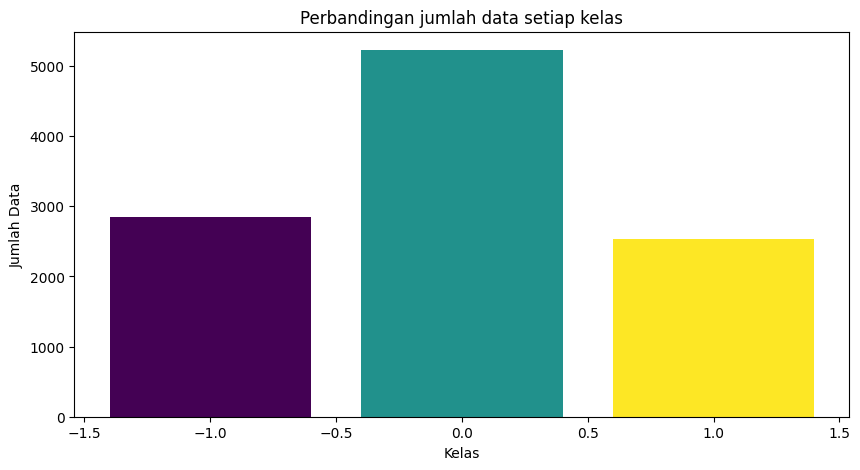

In [13]:
names = data.groupby(['sentimen']).size().index.to_list()
values = data.groupby(['sentimen']).size().to_list()

# Menghasilkan warna menggunakan colormap
num_colors = len(names)
colors = cm.viridis(np.linspace(0, 1, num_colors))

plt.figure(figsize=(10, 5))
plt.bar(names, values, color=colors)
plt.xlabel('Kelas')
plt.ylabel('Jumlah Data')
plt.title('Perbandingan jumlah data setiap kelas')
plt.show()

## Word2Vec

In [14]:
X = data['stemming']  # Kolom teks
y = data['sentimen']  # Kolom label

In [15]:
# Preprocess text for Word2Vec
def preprocess_text(text):
    return simple_preprocess(text)

# Apply preprocessing to the text column
X_df = pd.DataFrame({'stemming': data['stemming']})
X_df['processed_text'] = X_df['stemming'].apply(preprocess_text)
X_df

,stemming,processed_text
0,lagu bosan save,"[lagu, bosan, save]"
1,lanjut diam erti hati,"[lanjut, diam, erti, hati]"
2,doa rezeki putus inna haa larizquna maa lahu m...,"[doa, rezeki, putus, inna, haa, larizquna, maa..."
3,makasih loh ntar hasil sisa,"[makasih, loh, ntar, hasil, sisa]"
4,faham jenis orang malaysia ret nak sangkut hos...,"[faham, jenis, orang, malaysia, ret, nak, sang..."
...,...,...
10613,hidup orang milik karunia,"[hidup, orang, milik, karunia]"
10614,uname ntar gua follow,"[uname, ntar, gua, follow]"
10615,laku temu maaf hati botkece,"[laku, temu, maaf, hati, botkece]"
10616,dah hafal,"[dah, hafal]"


In [16]:
# Prepare Word2Vec model
# sg=1 : menggunakan skipgram
word2vec_model = Word2Vec(sentences=X_df['processed_text'], vector_size=150, window=5, sg=1)

In [17]:
def get_average_word2vec(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

X_df['word2vec'] = X_df['processed_text'].apply(lambda x: get_average_word2vec(x, word2vec_model))
X_df

,stemming,processed_text,word2vec
0,lagu bosan save,"[lagu, bosan, save]","[0.022599379, -0.10406872, -0.0590228, -0.0888..."
1,lanjut diam erti hati,"[lanjut, diam, erti, hati]","[0.036017783, -0.082415536, -0.06379045, -0.05..."
2,doa rezeki putus inna haa larizquna maa lahu m...,"[doa, rezeki, putus, inna, haa, larizquna, maa...","[0.02525125, -0.09175922, -0.07091337, -0.0788..."
3,makasih loh ntar hasil sisa,"[makasih, loh, ntar, hasil, sisa]","[0.0071716323, -0.1117111, -0.059720933, -0.09..."
4,faham jenis orang malaysia ret nak sangkut hos...,"[faham, jenis, orang, malaysia, ret, nak, sang...","[0.07591792, -0.080137946, -0.087534845, -0.05..."
...,...,...,...
10613,hidup orang milik karunia,"[hidup, orang, milik, karunia]","[0.057322282, -0.092929445, -0.060840115, -0.0..."
10614,uname ntar gua follow,"[uname, ntar, gua, follow]","[0.012019842, -0.11510209, -0.05948122, -0.116..."
10615,laku temu maaf hati botkece,"[laku, temu, maaf, hati, botkece]","[0.022423252, -0.10813189, -0.05775208, -0.066..."
10616,dah hafal,"[dah, hafal]","[0.083431095, -0.05612645, -0.09341305, -0.050..."


In [18]:
X_word2vec = np.array(X_df['word2vec'].tolist())
X_word2vec.shape

(10618, 150)

In [26]:
display("X_df.columns", X_df.columns)
display("Y", y)

'X_df.columns'

Index(['stemming', 'processed_text', 'word2vec'], dtype='object')

'Y'

0       -1
1       -1
2        1
3        1
4       -1
        ..
10613    1
10614    0
10615    1
10616    1
10617    1
Name: sentimen, Length: 10618, dtype: int64

## Membagi data menjadi training dan testing

In [19]:
# 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_word2vec, y, test_size=0.2, random_state=42)

print('Jumlah data train :', X_train.shape[0])
print('Jumlah data test  :', X_test.shape[0])

Jumlah data train : 8494
Jumlah data test  : 2124


## Naive Bayes

In [36]:
from sklearn.naive_bayes import BernoulliNB, ComplementNB, GaussianNB

### Bernoulli Naive-Bayes (BNB)

In [27]:
bnbclassifier = BernoulliNB()
bnbclassifier = bnbclassifier.fit(X_train, y_train)

In [33]:
y_pred = bnbclassifier.predict(X_test)
y_pred

array([-1, -1, -1, ...,  0, -1,  1], dtype=int64)

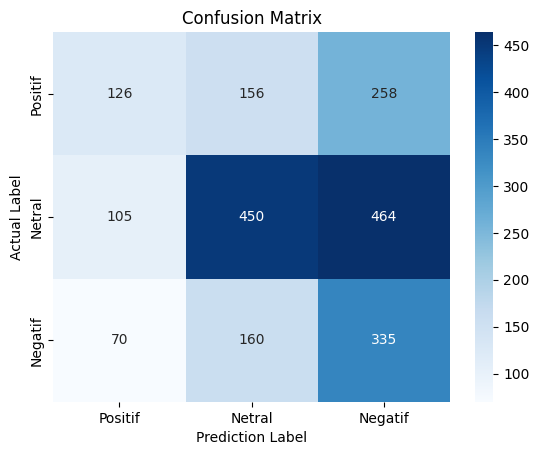

In [34]:
Confusion_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0, -1])
class_label      = ['Positif', 'Netral', 'Negatif', ]
df_confusion     = pd.DataFrame(Confusion_matrix, index = class_label, columns = class_label)

sns.heatmap(df_confusion, annot=True, fmt = "d", cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Prediction Label')
plt.ylabel('Actual Label')
plt.show()

In [35]:
_accuracy   = round(accuracy_score(y_test, y_pred)*100, 2)
_precission = round(precision_score(y_test, y_pred, average='weighted')*100, 2)
_recall     = round(recall_score(y_test, y_pred, average='weighted')*100, 2)
_fscore     = round(f1_score(y_test, y_pred, average='weighted')*100, 2)

print('Accuracy   =', _accuracy,'%')
print('Precission =', _precission,'%')
print('Recall     =', _recall,'%')
print('F1-Score   =', _fscore,'%')

Accuracy   = 42.89 %
Precission = 47.26 %
Recall     = 42.89 %
F1-Score   = 42.8 %


### Gausian Naive-Bayes (GNB)

In [44]:
gnbclassifier = GaussianNB()
gnbclassifier = gnbclassifier.fit(X_train, y_train)

In [45]:
y_pred = gnbclassifier.predict(X_test)
y_pred

array([-1, -1, -1, ...,  0, -1,  1], dtype=int64)

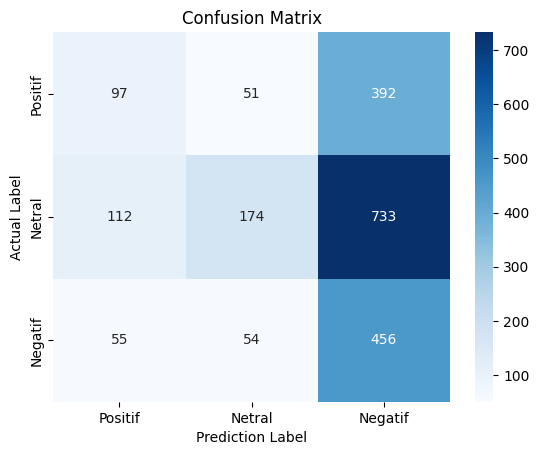

In [46]:
Confusion_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0, -1])
class_label      = ['Positif', 'Netral', 'Negatif', ]
df_confusion     = pd.DataFrame(Confusion_matrix, index = class_label, columns = class_label)

sns.heatmap(df_confusion, annot=True, fmt = "d", cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Prediction Label')
plt.ylabel('Actual Label')
plt.show()

In [47]:
_accuracy   = round(accuracy_score(y_test, y_pred)*100, 2)
_precission = round(precision_score(y_test, y_pred, average='weighted')*100, 2)
_recall     = round(recall_score(y_test, y_pred, average='weighted')*100, 2)
_fscore     = round(f1_score(y_test, y_pred, average='weighted')*100, 2)

print('Accuracy   =', _accuracy,'%')
print('Precission =', _precission,'%')
print('Recall     =', _recall,'%')
print('F1-Score   =', _fscore,'%')

Accuracy   = 34.23 %
Precission = 46.93 %
Recall     = 34.23 %
F1-Score   = 30.3 %


## Support Vector Machine (SVM)

In [20]:
svclassifier = SVC(kernel='linear', C=100, gamma=10)
svclassifier.fit(X_train, y_train)

SVC(C=100, gamma=10, kernel='linear')

In [38]:
y_pred = svclassifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

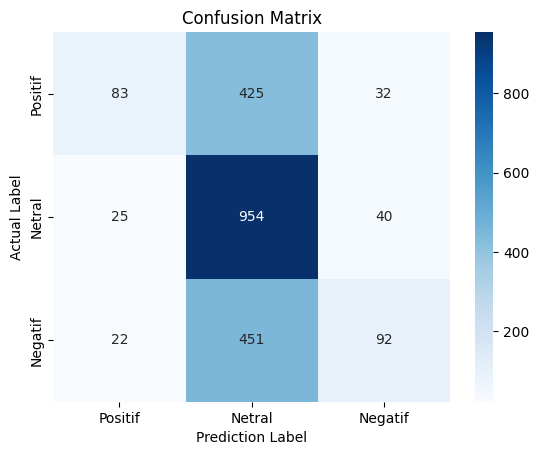

In [39]:
Confusion_matrix = confusion_matrix(y_test, y_pred, labels=[1, 0, -1])
class_label      = ['Positif', 'Netral', 'Negatif', ]
df_confusion     = pd.DataFrame(Confusion_matrix, index = class_label, columns = class_label)

sns.heatmap(df_confusion, annot=True, fmt = "d", cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Prediction Label')
plt.ylabel('Actual Label')
plt.show()

In [40]:
_accuracy   = round(accuracy_score(y_test, y_pred)*100, 2)
_precission = round(precision_score(y_test, y_pred, average='weighted')*100, 2)
_recall     = round(recall_score(y_test, y_pred, average='weighted')*100, 2)
_fscore     = round(f1_score(y_test, y_pred, average='weighted')*100, 2)

print('Accuracy   =', _accuracy,'%')
print('Precission =', _precission,'%')
print('Recall     =', _recall,'%')
print('F1-Score   =', _fscore,'%')

Accuracy   = 53.15 %
Precission = 56.16 %
Recall     = 53.15 %
F1-Score   = 45.14 %
